## Import Dataset

In [1]:
import pandas as pd
import missingno as msno
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
url = "https://raw.githubusercontent.com/WiraDKP/supervised_learning/master/05%20-%20SVM/data/carprice.csv"
data = pd.read_csv(url, index_col="ID")

data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price
ID,,,,,,,,,,,,
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


## CEK MISSING VALUES

<Axes: >

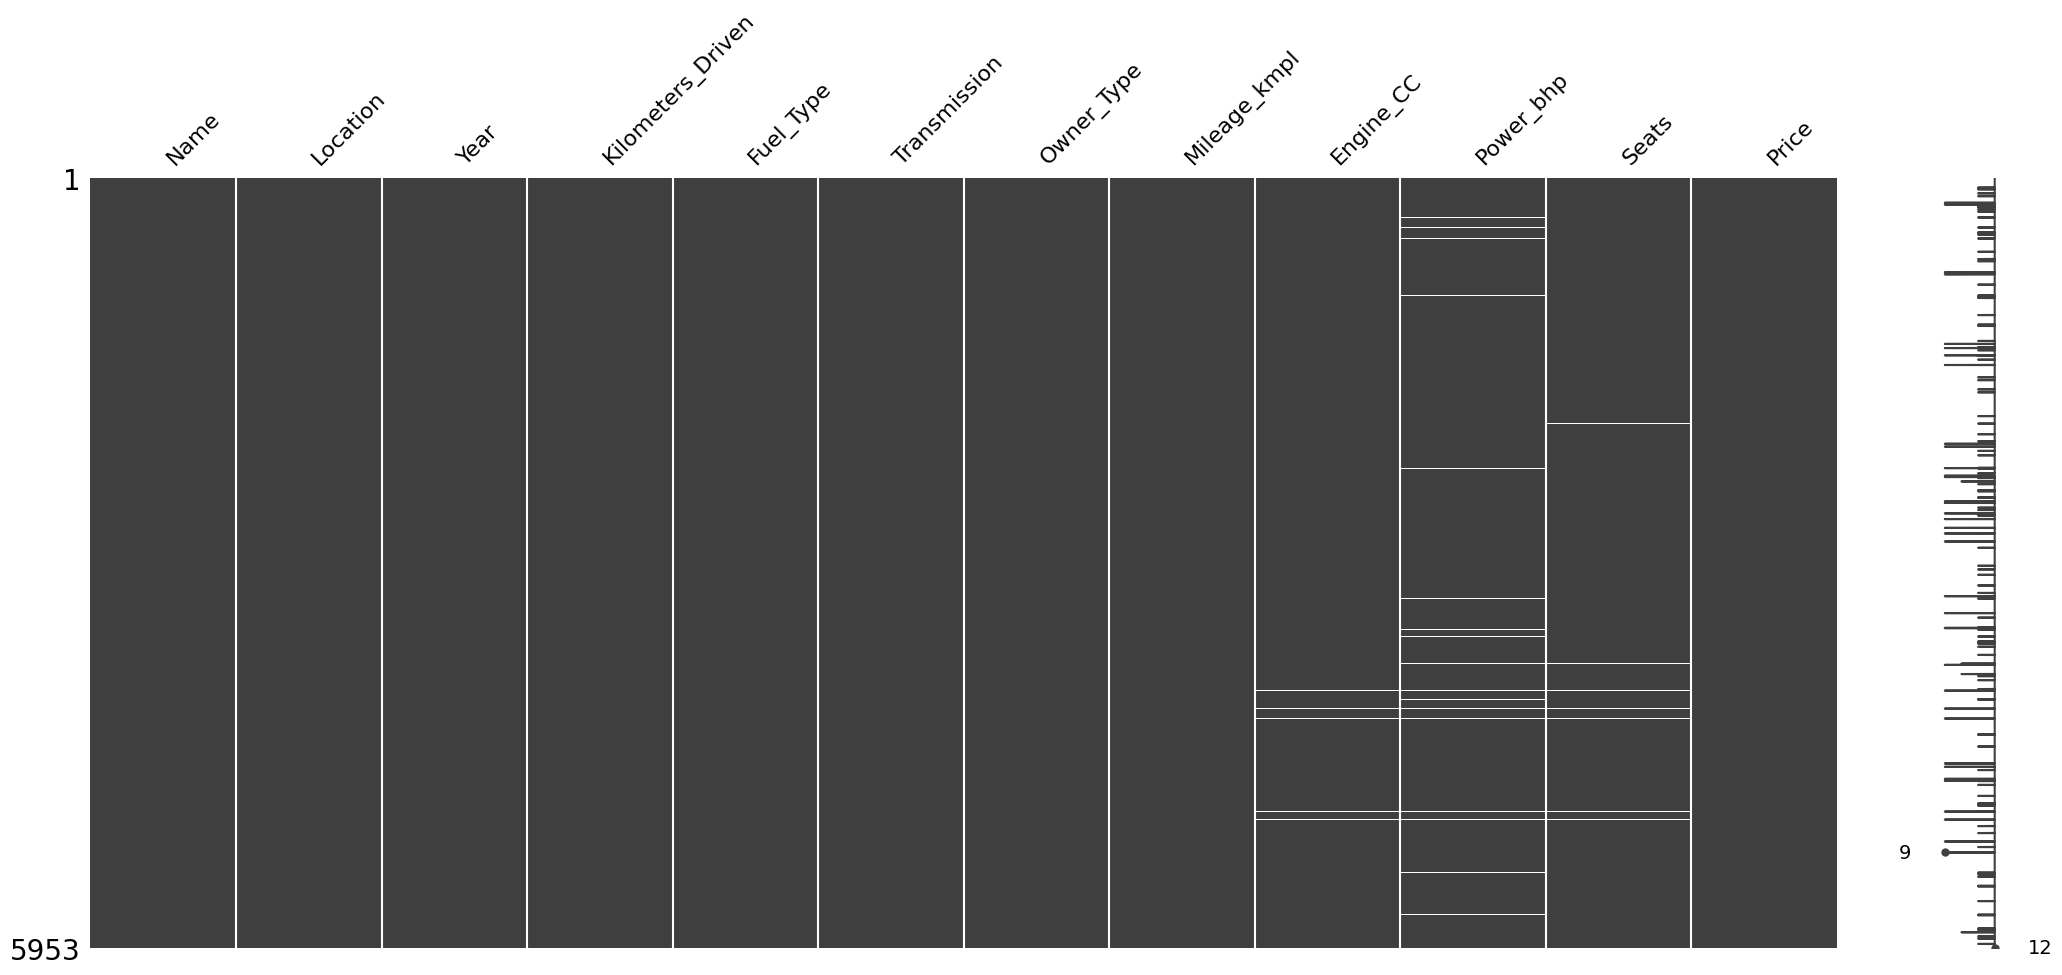

In [3]:
msno.matrix(data)

In [4]:
data.drop(columns="Name", inplace=True)

In [5]:
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price
ID,,,,,,,,,,,
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
6,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50


# SPLITTING

In [6]:
X = data.drop(columns="Price")
y = data["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4762, 10), (1191, 10), (4762,), (1191,))

## Training

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4762 entries, 4380 to 866
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           4762 non-null   object 
 1   Year               4762 non-null   int64  
 2   Kilometers_Driven  4762 non-null   int64  
 3   Fuel_Type          4762 non-null   object 
 4   Transmission       4762 non-null   object 
 5   Owner_Type         4762 non-null   object 
 6   Mileage_kmpl       4760 non-null   float64
 7   Engine_CC          4732 non-null   float64
 8   Power_bhp          4646 non-null   float64
 9   Seats              4726 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 409.2+ KB


## SETTING PIPELINE DAN PARAMETER

In [8]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), ['Year', 'Kilometers_Driven', 'Mileage_kmpl', 'Engine_CC', 'Power_bhp', 'Seats']),

        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type'])
    ]
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('algo', SVR(max_iter=500))
])

parameter = {
    'algo__gamma': ['scale', 'auto', 0.01, 0.1, 1, 10],
    'algo__C': [0.1, 1, 10, 100, 1000]
}

## TRAIN MODEL

In [9]:
model = GridSearchCV(pipeline, param_grid=parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Year',
                                                                          'Kilometers_Driven',
                                                                          'Mileage_kmpl',
                                                                          'Engine_CC',
                                                                          'Power_bhp',
                                                                          'Seats']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Location',
                                                                          'Fuel_Type',
                                                                          'Transmission',
                                                                          'Owner_Type'])])),
                                       ('algo', SVR(max_iter=500))]),
             n_jobs=-1,
             param_grid={'algo__C': [0.1, 1, 10, 100, 1000],
                         'algo__gamma': ['scale', 'auto', 0.01, 0.1, 1, 10]},
             verbose=1)

## EVALUASI MODEL

In [10]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Menggunakan model yang sudah di-fit untuk melakukan prediksi
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Menghitung metrik untuk data pelatihan (train)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mape_train = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

# Menghitung metrik untuk data pengujian (test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mape_test = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

# Menampilkan hasil evaluasi
print("Train Evaluation Metrics:")
print(f"R²: {r2_train:.4f}")
print(f"MAE: {mae_train:.4f}")
print(f"MSE: {mse_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"MAPE: {mape_train:.4f}%")

print("\nTest Evaluation Metrics:")
print(f"R²: {r2_test:.4f}")
print(f"MAE: {mae_test:.4f}")
print(f"MSE: {mse_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"MAPE: {mape_test:.4f}%")

Train Evaluation Metrics:
R²: 0.8595
MAE: 2.4473
MSE: 17.2220
RMSE: 4.1499
MAPE: 44.2437%

Test Evaluation Metrics:
R²: 0.8197
MAE: 2.6553
MSE: 25.2685
RMSE: 5.0268
MAPE: 46.1385%


## PREDIKSI DATA BARU

In [11]:
new_data = {
    'Location': ['Pune', 'Chennai', 'Coimbatore', 'Jaipur'],
    'Year': [2016, 2017, 2018, 2019],
    'Kilometers_Driven': [35000, 42000, 49000, 33000],
    'Fuel_Type': ['Diesel', 'Petrol', 'Diesel', 'Petrol'],
    'Transmission': ['Manual', 'Automatic', 'Manual', 'Automatic'],
    'Owner_Type': ['First', 'Second', 'First', 'First'],
    'Mileage_kmpl': [18.5, 16.0, 19.0, 17.5],
    'Engine_CC': [1500.0, 1300.0, 1800.0, 1200.0],
    'Power_bhp': [110.0, 90.0, 150.0, 85.0],
    'Seats': [5, 5, 7, 5]
}

new_df = pd.DataFrame(new_data)
new_df['Price_Predicted'] = model.predict(new_df)
new_df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_kmpl,Engine_CC,Power_bhp,Seats,Price_Predicted
0,Pune,2016,35000,Diesel,Manual,First,18.5,1500.0,110.0,5,7.979001
1,Chennai,2017,42000,Petrol,Automatic,Second,16.0,1300.0,90.0,5,5.793520
2,Coimbatore,2018,49000,Diesel,Manual,First,19.0,1800.0,150.0,7,14.694482
3,Jaipur,2019,33000,Petrol,Automatic,First,17.5,1200.0,85.0,5,6.937122
